In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.shape

(400, 5)

In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## EDA Analysis

### 1. Univariate Analysis

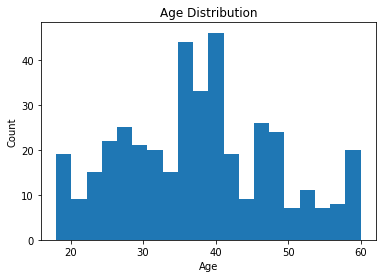

In [9]:
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

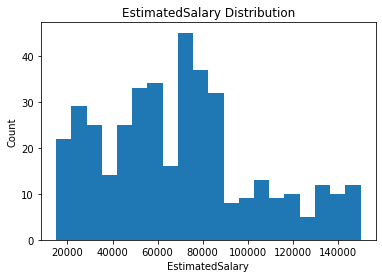

In [10]:
plt.hist(df['EstimatedSalary'], bins=20)
plt.title('EstimatedSalary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.show()

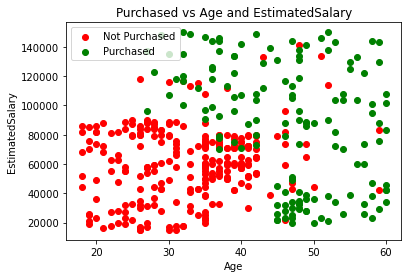

In [11]:
plt.scatter(df[df['Purchased']==0]['Age'], df[df['Purchased']==0]['EstimatedSalary'], color='red')
plt.scatter(df[df['Purchased']==1]['Age'], df[df['Purchased']==1]['EstimatedSalary'], color='green')
plt.title('Purchased vs Age and EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend(['Not Purchased', 'Purchased'])
plt.show()

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

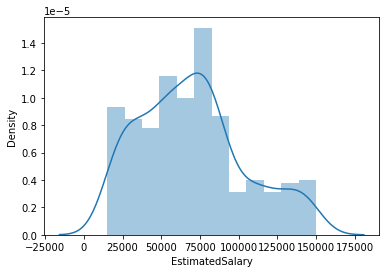

In [31]:
sns.distplot(df["EstimatedSalary"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

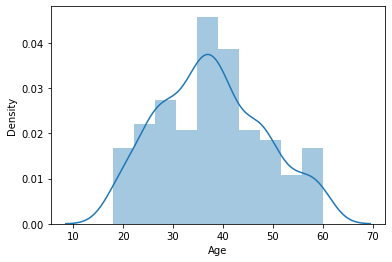

In [13]:
sns.distplot(df["ge"])

### 2. Bivariate or Multivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

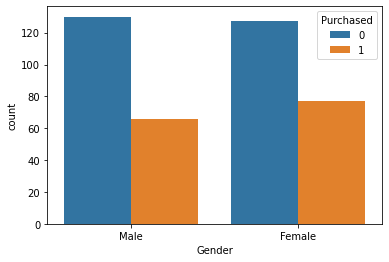

In [32]:
sns.countplot(x=df['Gender'], hue=df['Purchased'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

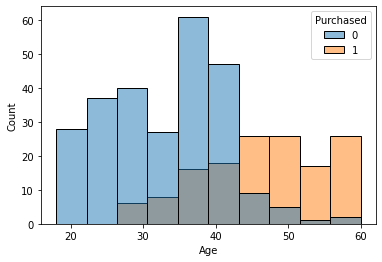

In [33]:
sns.histplot(x=df['Age'], hue=df['Purchased'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

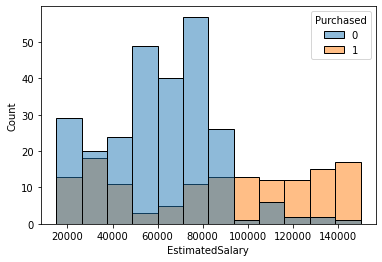

In [34]:
sns.histplot(data=df, x='EstimatedSalary', hue='Purchased')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

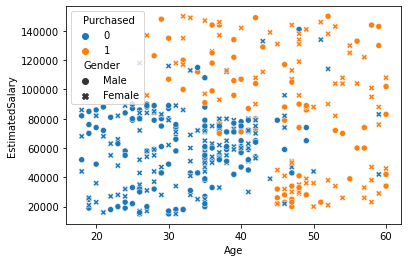

In [35]:
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', style='Gender')

<AxesSubplot:>

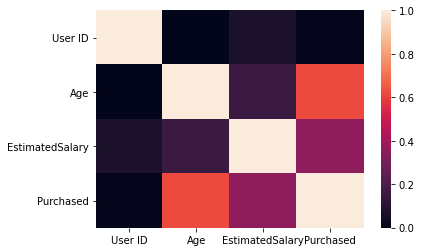

In [36]:
sns.heatmap(df.corr())

## Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lr = LabelEncoder()

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [18]:
df['Gender'].unique()

array([1, 0])

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


## Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
df.loc[:,['Age','EstimatedSalary']] = sc.fit_transform(df.loc[:,['Age','EstimatedSalary']].values)

In [23]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,-1.781797,-1.490046,0
1,15810944,1,-0.253587,-1.460681,0
2,15668575,0,-1.113206,-0.785290,0
3,15603246,0,-1.017692,-0.374182,0
4,15804002,1,-1.781797,0.183751,0


## Train test split

In [24]:
x = df.loc[:,['Age','EstimatedSalary']]
y = df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [28]:
prediction = lr.predict(X_test)
predictionData = {"Prediction":prediction,"Actual":y_test}
predictionData = pd.DataFrame(predictionData)
predictionData.sample(5)

,Prediction,Actual
113,0,0
222,1,1
97,0,1
241,0,0
78,0,0


## Matrices

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

## Confusion matrix

In [30]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[48  4]
 [ 5 23]]


## Accuracy score

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 88.75%


## Error rate

In [32]:
error_rate = 1 - accuracy
print("Error Rate: {:.2f}%".format(error_rate*100))

Error Rate: 11.25%


## Recall score

In [33]:
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall*100))

Recall: 82.14%
